In [7]:
from skimage.io import imread
from skimage import img_as_float, metrics
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [8]:
# Шаг 1: Загрузка изображения
image = imread('parrots.jpg')
image = img_as_float(image)

In [9]:
# Шаг 2: Создание матрицы объекты-признаки
w, h, d = image.shape
features = np.reshape(image, (w * h, d))

In [10]:
# Шаг 3: Запуск алгоритма K-Means
kmeans = KMeans(init='k-means++', n_clusters=20, random_state=241)
kmeans.fit(features)

labels = kmeans.predict(features)
centers = kmeans.cluster_centers_

mean_colors = np.array([centers[label] for label in labels])
mean_image = np.reshape(mean_colors, (w, h, d))

median_colors = np.array([np.median(features[labels == i], axis=0) for i in range(20)])
median_image = np.reshape(median_colors[labels], (w, h, d))

c:\Users\dima_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
# Шаг 4: Измерение качества
def psnr_calculate(image1, image2):
    # Проверка успешности загрузки изображений
    if image1 is None or image2 is None:
        print("Failed to load one or both images.")
        return None

    # Изменение размеров изображений
    resized_width = 256
    resized_height = 256
    image1 = cv2.resize(image1, (resized_width, resized_height))
    image2 = cv2.resize(image2, (resized_width, resized_height))

    # Вычисление PSNR с использованием библиотеки skimage
    psnr = metrics.peak_signal_noise_ratio(image1, image2)

    return psnr

psnr_mean = psnr_calculate(image, mean_image)
psnr_median = psnr_calculate(image, median_image)

print(f"PSNR среднее: {psnr_mean:.2f}")
print(f"PSNR медианное: {psnr_median:.2f}")

PSNR среднее: 23.69
PSNR медианное: 23.54


In [12]:
# Шаг 5: Минимальное количество кластеров
min_clusters = 0
for n_clusters in range(1, 21):
    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, random_state=241)
    kmeans.fit(features)
    labels = kmeans.predict(features)
    mean_colors = np.array([np.mean(features[labels == i], axis=0) for i in range(n_clusters)])
    clustered_image = np.reshape(mean_colors[labels], (w, h, d))
    psnr = psnr_calculate(image, clustered_image)
    if psnr > 20:
        min_clusters = n_clusters
        break

print(f"Минимальное количество кластеров при PSNR > 20: {min_clusters}")

c:\Users\dima_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dima_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dima_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dima_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

Минимальное количество кластеров при PSNR > 20: 10


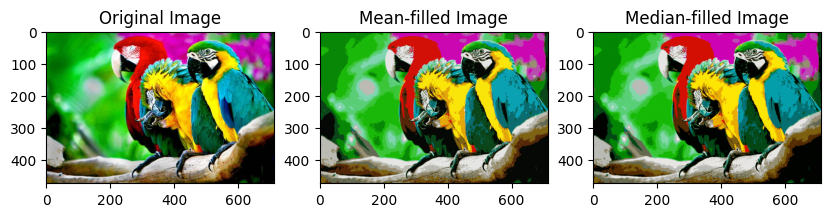

In [13]:
%matplotlib inline
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(mean_image)
plt.title("Mean-filled Image")

plt.subplot(1, 3, 3)
plt.imshow(median_image)
plt.title("Median-filled Image")

plt.show()